In [6]:
%load_ext autotime

time: 0 ns (started: 2024-02-24 10:24:22 +03:00)


In [7]:
! kaggle datasets download -d cashutosh/gender-classification-dataset

gender-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
time: 1.91 s (started: 2024-02-24 10:24:23 +03:00)


In [8]:
from zipfile import ZipFile

data_zip = './gender-classification-dataset.zip'

with ZipFile(data_zip, 'r') as zip:
    zip.extractall()
    print(str(data_zip), " is extracted")

./gender-classification-dataset.zip  is extracted
time: 32.3 s (started: 2024-02-24 10:24:25 +03:00)


In [26]:
import os
os.environ['TF_CPP_LOG_LEVLE'] = '3'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as ming
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import models, layers
import random

import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

time: 0 ns (started: 2024-02-24 10:34:31 +03:00)


In [40]:
gpu_dev = tf.config.list_physical_devices("GPU")
if gpu_dev:
    for gpu in gpu_dev:
        print(f'Device name {gpu.name}')
        print(f'Device type: {gpu.device_type}') 

Device name /physical_device:GPU:0
Device type: GPU
time: 0 ns (started: 2024-02-24 10:45:42 +03:00)


In [11]:
IMG_HIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 128
EPOCHS = 10

time: 0 ns (started: 2024-02-24 10:25:42 +03:00)


In [12]:
train_ds_path = './Training/'
valid_ds_path = './Validation/'

time: 0 ns (started: 2024-02-24 10:25:43 +03:00)


In [13]:
count = 0
data_dir = os.listdir('./Training/')
for dir in data_dir:
    files = list(os.listdir('Training/' + dir))
    print(dir, ' with '+ str(len(files)) + ' images')
    count = count + len(files)
print(f'The total images in Training folder : {str(count)}')

female  with 23243 images
male  with 23766 images
The total images in Training folder : 47009
time: 16 ms (started: 2024-02-24 10:25:46 +03:00)


In [14]:
count = 0
data_dir = os.listdir('./Validation/')
for dir in data_dir:
    files = list(os.listdir('Validation/' + dir))
    print(dir, ' with '+ str(len(files))+ ' images')
    count = count + len(files)
print(f'The total images in Validation folder: {str(count)}')

female  with 5841 images
male  with 5808 images
The total images in Validation folder: 11649
time: 0 ns (started: 2024-02-24 10:25:48 +03:00)


In [15]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_ds_path,
    shuffle=True,
    image_size=(IMG_HIGHT, IMG_WIDTH),
    batch_size= BATCH_SIZE,
    validation_split=False
)

Found 47009 files belonging to 2 classes.
time: 3.41 s (started: 2024-02-24 10:25:50 +03:00)


In [16]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory=valid_ds_path,
    shuffle=False,
    image_size=(IMG_HIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    validation_split=False
)

Found 11649 files belonging to 2 classes.
time: 782 ms (started: 2024-02-24 10:25:55 +03:00)


In [17]:
gender_class = train_ds.class_names
gender_class

['female', 'male']

time: 16 ms (started: 2024-02-24 10:25:57 +03:00)


In [18]:
def show_img(data_path, data_class, set_name):
    idx_plot = 1
    idx_rand = random.randrange(254)
    plt.figure(figsize=(6, 6))
    plt.suptitle(str(set_name))
    for i in os.listdir(data_path):
        img = load_img((data_path +i) + '/' + os.listdir(data_path + i)[idx_rand])
        plt.subplot(1, len(data_class), idx_plot)
        plt.imshow(img)
        plt.axis('off')
        plt.title(i)
        idx_plot = idx_plot + 1


time: 0 ns (started: 2024-02-24 10:26:00 +03:00)


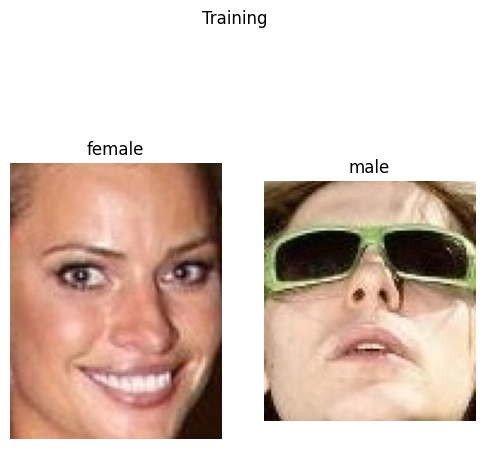

time: 313 ms (started: 2024-02-24 10:26:01 +03:00)


In [19]:
show_img(data_path=train_ds_path, data_class=gender_class, set_name='Training')

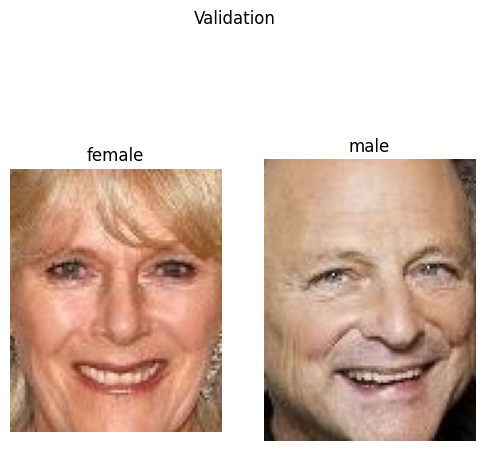

time: 172 ms (started: 2024-02-24 10:26:06 +03:00)


In [20]:
show_img(data_path=valid_ds_path, data_class=gender_class, set_name='Validation')

In [21]:
model = models.Sequential()

time: 15 ms (started: 2024-02-24 10:26:12 +03:00)


In [22]:
data_aug = models.Sequential([
    tf.keras.layers.RandomFlip('horizontal', input_shape=(IMG_HIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
    
])

time: 890 ms (started: 2024-02-24 10:27:05 +03:00)


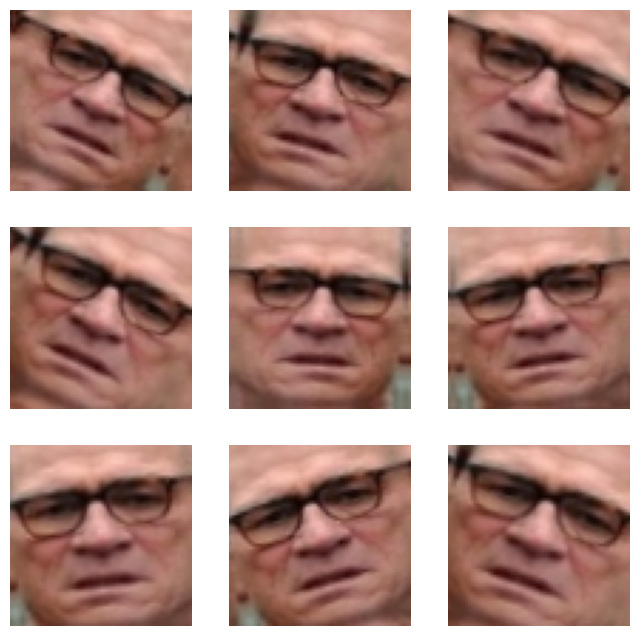

time: 27.7 s (started: 2024-02-24 10:34:37 +03:00)


In [27]:
plt.figure(figsize=(8, 8))
for imgs, _ in train_ds.take(1):
    for i in range(9):
        augm_imgs = data_aug(imgs)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augm_imgs[0].numpy().astype('uint8'))
        plt.axis('off')
    

In [41]:
model = models.Sequential([
    data_aug,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(len(gender_class), activation='sigmoid')

])

time: 125 ms (started: 2024-02-24 10:46:21 +03:00)


In [42]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

time: 0 ns (started: 2024-02-24 10:46:36 +03:00)


In [43]:
history = model.fit(x = train_ds, validation_data=valid_ds, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/10


368/368 [==============================] - 887s 2s/step - loss: 0.4228 - accuracy: 0.8182 - val_loss: 1.2020 - val_accuracy: 0.5373
Epoch 2/10
368/368 [==============================] - 730s 2s/step - loss: 0.2115 - accuracy: 0.9195 - val_loss: 0.1458 - val_accuracy: 0.9478
Epoch 3/10
368/368 [==============================] - 654s 2s/step - loss: 0.1761 - accuracy: 0.9344 - val_loss: 0.1231 - val_accuracy: 0.9549
Epoch 4/10
368/368 [==============================] - 662s 2s/step - loss: 0.1577 - accuracy: 0.9420 - val_loss: 0.1740 - val_accuracy: 0.9342
Epoch 5/10
368/368 [==============================] - 790s 2s/step - loss: 0.1464 - accuracy: 0.9462 - val_loss: 0.1320 - val_accuracy: 0.9544
Epoch 6/10
368/368 [==============================] - 878s 2s/step - loss: 0.1378 - accuracy: 0.9496 - val_loss: 0.1214 - val_accuracy: 0.9533
Epoch 7/10
368/368 [==============================] - 682s 2s/step - loss: 0.1323 - accuracy: 0.9523 - val_loss: 0.1643 - val_accuracy: 0.9348
Epoch 8/10

In [44]:
model.save('model-1.h5')

time: 172 ms (started: 2024-02-24 13:03:39 +03:00)


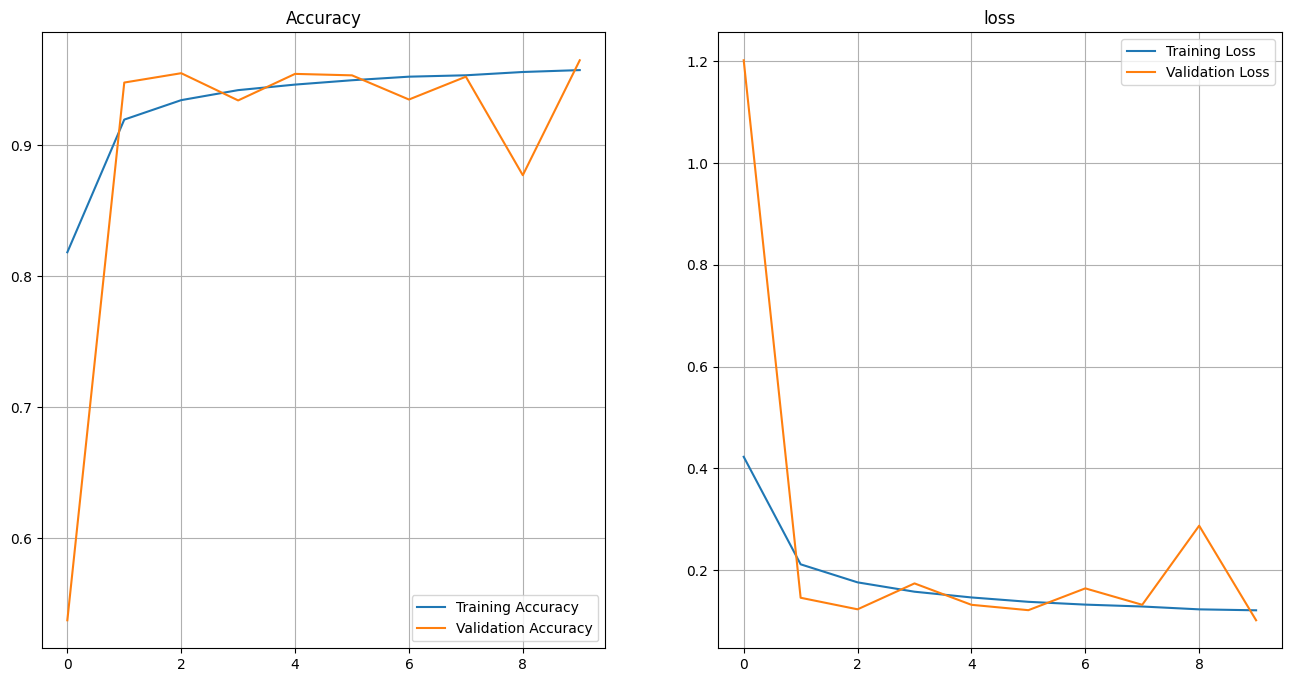

time: 375 ms (started: 2024-02-24 13:03:48 +03:00)


In [45]:
epcohs_range = range(EPOCHS)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epcohs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epcohs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epcohs_range, history.history['loss'], label='Training Loss')
plt.plot(epcohs_range, history.history['val_loss'], label='Validation Loss')
plt.title('loss')
plt.legend()
plt.grid()

In [47]:
img = 'pexels-anna-shvets-4226462.jpg'
img = tf.keras.utils.load_img(img, target_size=(IMG_HIGHT, IMG_WIDTH))
img_to_array = tf.keras.utils.img_to_array(img)
img_dims = tf.expand_dims(img_to_array, 0)

time: 16 ms (started: 2024-02-24 13:04:44 +03:00)


In [48]:
pred = model.predict(img_dims)

1/1 [==============================] - 0s 196ms/step
time: 266 ms (started: 2024-02-24 13:04:47 +03:00)


(-0.5, 63.5, 63.5, -0.5)

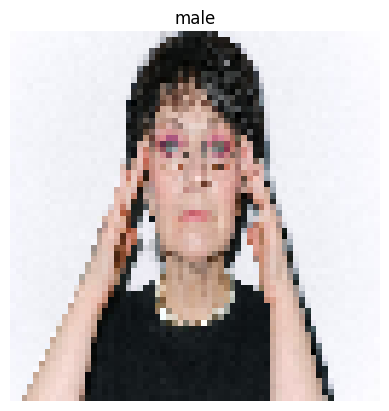

time: 78 ms (started: 2024-02-24 13:04:49 +03:00)


In [49]:
result = tf.nn.softmax(pred[0])
plt.imshow(img)
plt.title(gender_class[np.argmax(result)])
plt.axis('off')